In [1]:
import numpy as np
import os
import pandas as pd
import h5py

from astrometry.util.fits import fits_table, merge_tables

# To plot pretty figures
%matplotlib inline
#%matplotlib notebook

# to make this notebook's output stable across runs
def reset_graph(seed=7):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

import tensorflow as tf

%load_ext autoreload
%autoreload 2

/Users/kaylan1/miniconda3/envs/mlbook/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [30]:
from obiwan.qa.visual import plotImage, readImage, sliceImage

# Compare fits coadd grz (.hdf5, .npy) to the nice color .jpg files 

In [35]:
f_dr5= h5py.File(os.path.join(os.environ['HOME'],'DOWNLOADS',
                    'google_ai/hdf5/%s/121/1211p060/img_ivar_grz.hdf5' % 'dr5'),
                    'r') #1165p107

f_sim= h5py.File(os.path.join(os.environ['HOME'],'DOWNLOADS',
                    'google_ai/hdf5/%s/121/1211p060/img_ivar_grz.hdf5' % 'sim'),
                 'r')

f_sim_jpeg= h5py.File(os.path.join(os.environ['HOME'],'DOWNLOADS',
                    'google_ai/hdf5/%s/121/1211p060/jpeg_grz.hdf5' % 'sim'),
                 'r')

def get_data(f,num=128):
    """Returns numpy array (num,64,64,6)"""
    return np.array([np.stack([f[key+'/img'],f[key+'/ivar']],axis=-1).reshape((64,64,6))
                     for key in list(f.keys())[:num]])

def get_data_imgonly(f,num=128):
    """Returns numpy array (num,64,64,3)"""
    return np.array([np.reshape(f[key+'/img'],(64,64,3))
                     for key in list(f.keys())[:num]])


In [31]:
sliceImage?

In [37]:
keys=dict(dr5=[key for key in f_dr5.keys()],
          sim=[key for key in f_sim.keys()],
          jpeg=list(f_sim_jpeg.keys()))
len(keys['dr5']),len(keys['sim']),len(keys['jpeg']), keys['dr5'][0]

(880, 259, 259, '1005')

In [45]:
f_sim['/%s/ivar' % keys['sim'][i]].shape

(64, 64, 3)

In [67]:
plotImage?

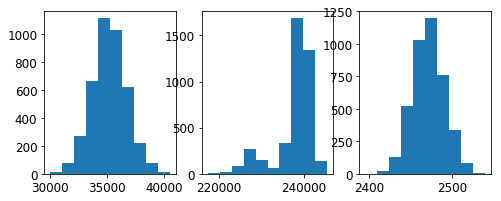

In [66]:
fig,ax= plt.subplots(1,3,figsize=(8,3))
for i in range(3):
    _=ax[i].hist(f_sim['/%s/ivar' % keys['sim'][0]][:,:,i].flatten())

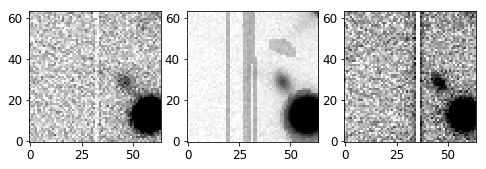

In [83]:
fig,ax= plt.subplots(1,3,figsize=(8,3))
for i in range(3):
    plotImage().imshow(f_sim['/%s/ivar' % keys['sim'][14]][:,:,i],ax[i],qs=[5,95])

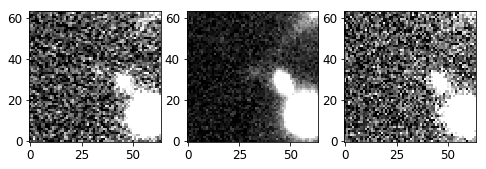

In [81]:
fig,ax= plt.subplots(1,3,figsize=(8,3))
for i in range(3):
    plotImage().imshow(f_sim['/%s/img' % keys['sim'][14]][:,:,i],ax[i],qs=[10,90])

In [96]:
f_sim_jpeg['/%s/img' % keys['sim'][i]][:,:,0].T.shape

(64, 64)

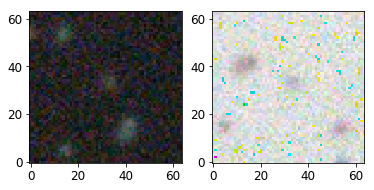

In [97]:
fig,ax= plt.subplots(1,2)
img= f_sim_jpeg['/%s/img' % keys['sim'][i]]
plotImage().imshow(img,ax[0])
img2= np.zeros(img.shape)
for i in range(3):
    img2[:,:,i]= img[:,:,i].T
plotImage().imshow(img2,ax[1])

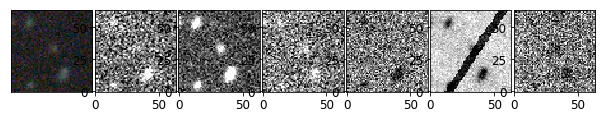

In [100]:
nrow,ncol=1,7
fig,ax= plt.subplots(nrow,ncol,figsize=(ncol*1.5,1.5*nrow))
plt.subplots_adjust(hspace=0.01,wspace=0.01)
i=-1
for row in range(nrow):
    i+=1
    plotImage().imshow(f_sim_jpeg['/%s/img' % keys['sim'][i]],ax[0])
    for iband,col in enumerate(range(1,4)):
        plotImage().imshow(f_sim['/%s/img' % keys['sim'][i]][:,:,iband].T,ax[col],qs=[3,97])
    for iband,col in enumerate(range(4,7)):
        plotImage().imshow(f_sim['/%s/ivar' % keys['sim'][i]][:,:,iband].T,ax[col],qs=[3,97])
    
for row in range(nrow):
    ax[row].set_xticks([])
    ax[row].set_yticks([])

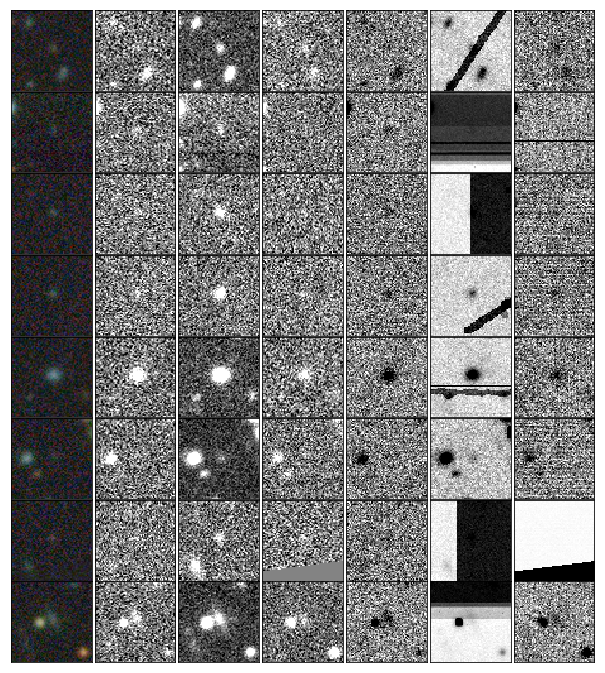

In [102]:
nrow,ncol=8,7
fig,ax= plt.subplots(nrow,ncol,figsize=(ncol*1.5,1.5*nrow))
plt.subplots_adjust(hspace=0.01,wspace=0.01)
i=-1
for row in range(nrow):
    i+=1
    plotImage().imshow(f_sim_jpeg['/%s/img' % keys['sim'][i]],ax[row,0])
    for iband,col in enumerate(range(1,4)):
        plotImage().imshow(f_sim['/%s/img' % keys['sim'][i]][:,:,iband].T,ax[row,col],qs=[3,97])
    for iband,col in enumerate(range(4,7)):
        plotImage().imshow(f_sim['/%s/ivar' % keys['sim'][i]][:,:,iband].T,ax[row,col],qs=[3,97])
    
for row in range(nrow):
    for col in range(ncol):
        ax[row,col].set_xticks([])
        ax[row,col].set_yticks([])
plt.savefig('mosaic.png')


In [12]:
from glob import glob
fns= glob(os.path.join(os.environ['HOME'],'Downloads',
                'dr5_testtrain/testtrain/121/1211p060/xtrain_*.npy'))
xtrain= [np.load(fn) for fn in fns]
np.vstack(xtrain).shape

(1408, 64, 64, 6)

In [34]:
jpg= readImage(os.path.join(os.environ['HOME'],'DOWNLOADS',
                    'google_ai/legacysurvey-1211p060-image.jpg'),jpeg=True)
sliceImage(jpg,xslice=slice(10,20),yslice=slice(10,20)).shape

(10, 10, 3)

In [29]:
os.path.basename('/global/cscratch1/sd/kaylanb/obiwan_out/elg_dr5_coadds/coadd/121/1211p060/rs0')

'rs0'

# Get training that were created with the split_traintest.py script using the for dr5 and image sims dr5 hdf5 cutouts

In [7]:
dr= os.path.join(os.environ['HOME'],'Downloads',
                'dr5_testtrain/testtrain/121/1211p060')
xtrain= np.load(os.path.join(dr,'xtrain_1.npy'))
ytrain= np.load(os.path.join(dr,'ytrain_1.npy'))
xtrain.shape,ytrain.shape,len(ytrain[ytrain == 0]),set(ytrain)


((512, 64, 64, 6), (512,), 250, {0.0, 1.0})

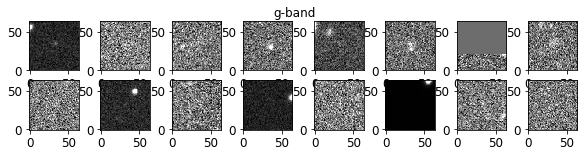

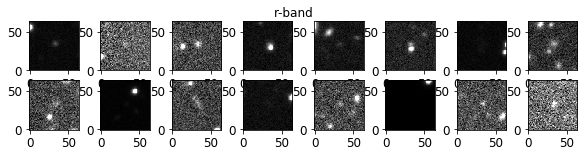

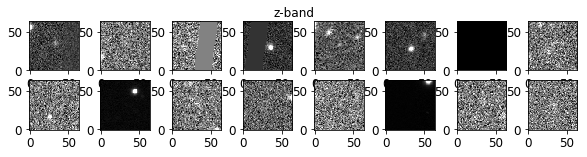

In [26]:
isFake= ytrain == 1
img_inds= [0,2,4]

nrow,ncol=2,8
for band,iband in zip('grz',img_inds):
    fig,ax= plt.subplots(nrow,ncol,figsize=(10,2))
    i=-1
    for row in range(nrow):
        for col in range(ncol):
            i+=1
            plotImage().imshow(xtrain[isFake][i,:,:,iband],ax[row,col])
    fig.suptitle('%s-band' % band)

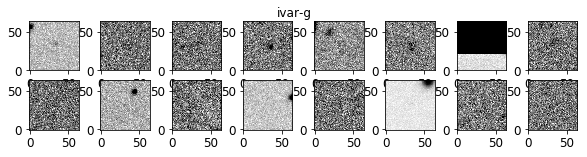

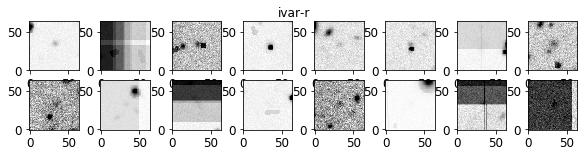

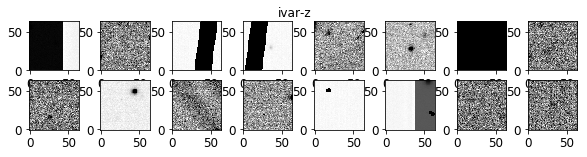

In [28]:
img_inds= np.array([0,2,4])+1

nrow,ncol=2,8
for band,iband in zip('grz',img_inds):
    fig,ax= plt.subplots(nrow,ncol,figsize=(10,2))
    i=-1
    for row in range(nrow):
        for col in range(ncol):
            i+=1
            plotImage().imshow(xtrain[isFake][i,:,:,iband],ax[row,col])
    fig.suptitle('ivar-%s' % band)

# Adapted from https://github.com/ageron/handson-ml

### TensorFlow

In [31]:
xtrain[0,...].shape, xtrain.dtype,ytrain.dtype

((64, 64, 6), dtype('float32'), dtype('float64'))

In [67]:
# Design:
# input, 3x(conv + avg pool), 2x(fc)

height,width,channels = (64,64,6) #images_real.shape

reset_graph()

conv_kwargs= dict(strides=1,
                  padding='SAME',
                  activation=tf.nn.relu)
pool_kwargs= dict(ksize= [1,2,2,1],
                  strides=[1,2,2,1],
                  padding='VALID')

with tf.name_scope("inputs"):
    X = tf.placeholder(tf.float32, shape=[None,height,width,channels], name="X") #training data shape
    #X_reshaped = tf.reshape(X, shape=[-1, height, width, channels])
    y = tf.placeholder(tf.int32, shape=[None], name="y") 

init = tf.global_variables_initializer()

# 64x64
with tf.name_scope("layer1"):
    conv1 = tf.layers.conv2d(X, filters=2*channels, kernel_size=7,
                             **conv_kwargs)
    pool1 = tf.nn.avg_pool(conv1, **pool_kwargs)

# 32x32
with tf.name_scope("layer2"):
    conv2 = tf.layers.conv2d(pool1, filters=4*channels, kernel_size=7,
                             **conv_kwargs)
    pool2 = tf.nn.avg_pool(conv2, **pool_kwargs)

# 16x16
with tf.name_scope("layer3"):
    conv3 = tf.layers.conv2d(pool2, filters=8*channels, kernel_size=7,
                             **conv_kwargs)
    pool3 = tf.nn.avg_pool(conv3, **pool_kwargs)
    # next is fc
    pool3_flat = tf.reshape(pool3, 
                            shape=[-1, pool3.shape[1] * pool3.shape[2] * pool3.shape[3]])


with tf.name_scope("fc"):
    fc = tf.layers.dense(pool3_flat, 64, activation=tf.nn.relu, name="fc")

with tf.name_scope("output"):
    logits = tf.layers.dense(fc, 2, name="output") # 2 classes
    Y_proba = tf.nn.softmax(logits, name="Y_proba")

with tf.name_scope("train"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y)
    loss = tf.reduce_mean(xentropy)
    optimizer = tf.train.AdamOptimizer()
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    
init = tf.global_variables_initializer()
saver = tf.train.Saver()

loss_summary= tf.summary.scalar('loss', loss)
accur_summary = tf.summary.scalar('accuracy', accuracy)

In [75]:
logits.op.name, loss.op.name, accuracy.op.name

('output/output/BiasAdd', 'train/Mean', 'eval/Mean')

In [68]:
def BatchGen(X,y,batch_size=32):
    # if not perfect divide, will drop extra training instances
    N= X.shape[0]
    ind= np.array_split(np.arange(N),N // batch_size)
    for i in ind:
        yield X[i,...],y[i].astype(np.int32) #.reshape(-1,1).astype(np.int32)
        
a=BatchGen(xtrain,ytrain,batch_size=32)
for X_,y_ in a:
    print('batch:',X_.shape,y_.shape)

batch: (32, 64, 64, 6) (32,)
batch: (32, 64, 64, 6) (32,)
batch: (32, 64, 64, 6) (32,)
batch: (32, 64, 64, 6) (32,)
batch: (32, 64, 64, 6) (32,)
batch: (32, 64, 64, 6) (32,)
batch: (32, 64, 64, 6) (32,)
batch: (32, 64, 64, 6) (32,)
batch: (32, 64, 64, 6) (32,)
batch: (32, 64, 64, 6) (32,)
batch: (32, 64, 64, 6) (32,)
batch: (32, 64, 64, 6) (32,)
batch: (32, 64, 64, 6) (32,)
batch: (32, 64, 64, 6) (32,)
batch: (32, 64, 64, 6) (32,)
batch: (32, 64, 64, 6) (32,)


In [69]:
from datetime import datetime

def get_logdir(root_logdir):
    now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
    return "{}/run-{}/".format(root_logdir, now)

In [70]:
batch_size=32
X_,y_= xtrain[:batch_size,...],ytrain[:batch_size].astype(np.int32)

with tf.Session() as sess:
    sess.run(init)
    print(sess.run(X, feed_dict={X: X_}).shape)
    print(sess.run(conv1, feed_dict={X: X_}).shape)
    print(sess.run(pool1, feed_dict={X: X_}).shape)
    print(sess.run(conv2, feed_dict={X: X_}).shape)
    print(sess.run(pool2, feed_dict={X: X_}).shape)
    print(sess.run(conv3, feed_dict={X: X_}).shape)
    print(sess.run(pool3, feed_dict={X: X_}).shape)
    print(sess.run(pool3_flat, feed_dict={X: X_}).shape)
    print(sess.run(fc, feed_dict={X: X_}).shape)
    print(sess.run(logits, feed_dict={X: X_}).shape) 
    

(32, 64, 64, 6)
(32, 64, 64, 12)
(32, 32, 32, 12)
(32, 32, 32, 24)
(32, 16, 16, 24)
(32, 16, 16, 48)
(32, 8, 8, 48)
(32, 3072)
(32, 64)
(32, 2)


In [72]:
xtrain= np.load(os.path.join(dr,'xtrain_1.npy'))
ytrain= np.load(os.path.join(dr,'ytrain_1.npy'))
file_writer = tf.summary.FileWriter(get_logdir(os.path.join(os.environ['HOME'],'Downloads',
                                                "cnn",'logs')), 
                                    tf.get_default_graph())

n_epochs = 4
batch_size = 32
n_batches= ytrain.shape[0]//batch_size + 1

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_epochs):
        data_gen= BatchGen(xtrain,ytrain,batch_size)
        batch_index=0
        for X_,y_ in data_gen:
            sess.run(training_op, feed_dict={X: X_, y: y_})
            batch_index+=1
            if i % 1 == 0:
                step = epoch * n_batches + batch_index
                file_writer.add_summary(loss_summary.eval(feed_dict={X: X_, y: y_}), 
                                        step)
                file_writer.add_summary(accur_summary.eval(feed_dict={X: X_, y: y_}), 
                                        step)
                
        acc_train = accuracy.eval(feed_dict={X: X_, y: y_})
        print(epoch, "Train accuracy:", acc_train)
        if epoch % 2 == 0:
            save_path = saver.save(sess, os.path.join(os.environ['HOME'],'Downloads',
                                                  "cnn/checkpoint.ckpt"))
    save_path = saver.save(sess, os.path.join(os.environ['HOME'],'Downloads',
                                              "cnn/final.ckpt"))

0 Train accuracy: 0.46875
1 Train accuracy: 0.78125
2 Train accuracy: 0.75
3 Train accuracy: 0.84375


# Train strating from checkpoint

In [59]:
xtrain= np.load(os.path.join(dr,'xtrain_2.npy'))
ytrain= np.load(os.path.join(dr,'ytrain_2.npy'))
with tf.Session() as sess:
    # Equiv of sess.run(init)
    saver.restore(sess, os.path.join(os.environ['HOME'],'Downloads',
                                              "cnn/final.ckpt")) 
    #print('resorted model has accur=',accuracy.eval())
    for epoch in range(n_epochs):
        data_gen= BatchGen(xtrain,ytrain,batch_size)
        for X_,y_ in data_gen:
            sess.run(training_op, feed_dict={X: X_, y: y_})
        acc_train = accuracy.eval(feed_dict={X: X_, y: y_})
        print(epoch, "Train accuracy:", acc_train)
        if epoch % 2 == 0:
            save_path = saver.save(sess, os.path.join(os.environ['HOME'],'Downloads',
                                                  "cnn/checkpoint.ckpt"))
    save_path = saver.save(sess, os.path.join(os.environ['HOME'],'Downloads',
                                              "cnn/final.ckpt"))
    

INFO:tensorflow:Restoring parameters from /Users/kaylan/Downloads/cnn/final.ckpt
0 Train accuracy: 0.90625
1 Train accuracy: 0.90625
2 Train accuracy: 0.90625
3 Train accuracy: 0.90625


# Credit: Aurélien Geron
### https://github.com/ageron/handson-ml/blob/master/09_up_and_running_with_tensorflow.ipynb

In [2]:
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = b"<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

# Using hdf5 files not the newer npy train/test split ones

In [4]:
f_real= h5py.File(os.path.join(os.environ['HOME'],'DOWNLOADS',
                    'dr5_hdf5/hdf5/121/1211p060/img_ivar_grz.hdf5'),
                    'r') #1165p107
dr5_tractor= fits_table(os.path.join(os.environ['HOME'],'DOWNLOADS',
                    'dr5_hdf5/hdf5/121/1211p060/tractor-1211p060.fits'))


f_fake= h5py.File(os.path.join(os.environ['HOME'],'DOWNLOADS',
                    'elg_dr5_coadds/hdf5/121/1211p060/img_ivar_grz.hdf5'),
                    'r')
simcat= fits_table(os.path.join(os.environ['HOME'],'DOWNLOADS',
                    'elg_dr5_coadds/hdf5/121/1211p060',
                    'simcat-elg-1211p060-rsALL.fits'))

print(len(f_real.keys()),len(f_fake.keys()),np.min([len(f_real.keys()),len(f_fake.keys())]))

OSError: Unable to open file (unable to open file: name = '/Users/kaylan/DOWNLOADS/dr5_hdf5/hdf5/121/1211p060/img_ivar_grz.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [87]:
def get_data(f,num=128):
    """Returns numpy array (num,64,64,6)"""
    return np.array([np.stack([f[key+'/img'],f[key+'/ivar']],axis=-1).reshape((64,64,6))
                     for key in list(f.keys())[:num]])

def get_data_imgonly(f,num=128):
    """Returns numpy array (num,64,64,3)"""
    return np.array([np.reshape(f[key+'/img'],(64,64,3))
                     for key in list(f.keys())[:num]])

real= get_data_imgonly(f_real,n)
real.shape

(128, 64, 64, 6)

In [92]:
inHdf5= pd.Series(dr5_tractor.objid).isin(list(f_real.keys()))
print(len(dr5_tractor[inHdf5]),len(list(f_real.keys())))
dr5_tractor.cut(inHdf5)
# flux_gt_0= ((inHdf5) &
#             (dr5_tractor.flux_g > 0) &
#             (dr5_tractor.flux_r > 0) &
#             (dr5_tractor.flux_z > 0))
# dr5_tractor.cut(flux_gt_0)

880 880


In [93]:
d= {b:dr5_tractor.get('flux_'+b)
    for b in 'grz'}
df= pd.DataFrame(d)
df= df.apply(lambda x: x.values.byteswap().newbyteorder())
df.describe()

,g,r,z
count,880.000000,880.000000,880.000000
mean,0.761698,1.529735,2.634772
std,0.746897,1.434992,2.366555
min,0.145401,0.261415,0.613148
25%,0.282475,0.506985,1.009587
50%,0.447857,0.891814,1.629145
75%,0.962490,2.082288,3.528070
max,4.510773,6.133409,14.447383


In [96]:
def flux2mag(nmgy):
    return -2.5 * (np.log10(nmgy) - 9)

assert('g' not in dr5_tractor.get_columns())
assert('g' not in simcat.get_columns())
for b in 'grz':
    dr5_tractor.set(b, flux2mag(dr5_tractor.get('flux_'+b)/dr5_tractor.get('mw_transmission_'+b)))
    simcat.set(b, flux2mag(simcat.get(b+'flux')))
dr5_tractor.set('gr', dr5_tractor.g - dr5_tractor.r)
dr5_tractor.set('rz', dr5_tractor.r - dr5_tractor.z)
simcat.set('gr', simcat.g - simcat.r)
simcat.set('rz', simcat.r - simcat.z)

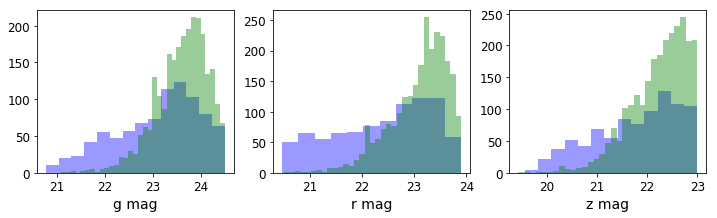

In [97]:
import seaborn as sns
fig,ax= plt.subplots(1,3,figsize=(12,3))
for i,b in enumerate('grz'):
    sns.distplot(dr5_tractor.get(b),kde=False,ax=ax[i],color='b')
    sns.distplot(simcat.get(b),kde=False,ax=ax[i],color='g')
    ax[i].set_xlabel(b + ' mag')


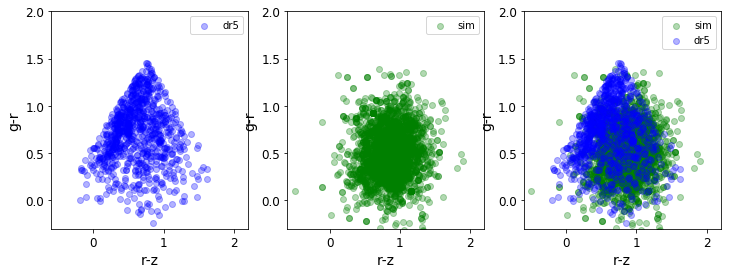

In [99]:
fig,ax=plt.subplots(1,3,figsize=(12,4))
ax[0].scatter(dr5_tractor.rz,dr5_tractor.gr,alpha=0.3,c='b',label='dr5')
ax[1].scatter(simcat.rz, simcat.gr,alpha=0.3,c='g',label='sim')
ax[2].scatter(simcat.rz, simcat.gr,alpha=0.3,c='g',label='sim')
ax[2].scatter(dr5_tractor.rz,dr5_tractor.gr,alpha=0.3,c='b',label='dr5')
# ax.plot(pad['x1'],pad['y1'],'r--')
# ax.plot(pad['x2'],pad['y2'],c='r',ls='--',lw=2)
# ax.plot(pad['x3'],pad['y3'],c='r',ls='--',lw=2)
# ax.plot(pad['x4'],pad['y4'],c='r',ls='--',lw=2)
for i in range(3):
    ax[i].set_xlabel('r-z')
    ax[i].set_ylabel('g-r')
    ax[i].set_ylim(-0.3,2)
    ax[i].set_xlim(-0.6,2.2)
    ax[i].legend()

### Try sample similar mag population of galaxies

/Users/kaylan1/miniconda3/envs/mlbook/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


135 544


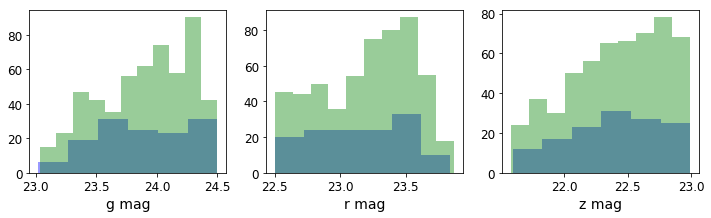

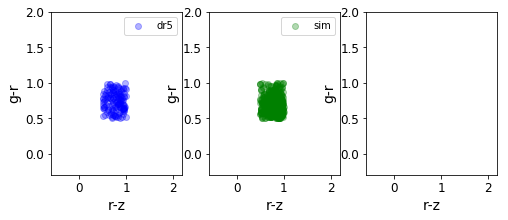

In [101]:
def inRegion(rz,gr):
    return ((rz > 0.5) &
            (rz < 1.) &
            (gr > 0.5) &
            (gr < 1.))

def isFaint(g,r,z):
    return ((g > 23.) &
            (r > 22.5) &
            (z > 21.5))
    
dr5_keep= ((inRegion(dr5_tractor.rz,dr5_tractor.gr)) & 
           (isFaint(dr5_tractor.g,dr5_tractor.r,dr5_tractor.z)))
sim_keep= ((inRegion(simcat.rz, simcat.gr)) &
           (isFaint(simcat.g,simcat.r,simcat.z)))


fig,ax= plt.subplots(1,3,figsize=(12,3))
for i,b in enumerate('grz'):
    sns.distplot(dr5_tractor.get(b)[dr5_keep],kde=False,ax=ax[i],color='b')
    sns.distplot(simcat.get(b)[sim_keep],kde=False,ax=ax[i],color='g')
    ax[i].set_xlabel(b + ' mag')
            
        
fig,ax= plt.subplots(1,3,figsize=(8,3))
ax[0].scatter(dr5_tractor.rz[dr5_keep], dr5_tractor.gr[dr5_keep],alpha=0.3,c='b',label='dr5')
ax[1].scatter(simcat.rz[sim_keep], simcat.gr[sim_keep],alpha=0.3,c='g',label='sim')
for i in range(3):
    ax[i].set_xlabel('r-z')
    ax[i].set_ylabel('g-r')
    ax[i].set_ylim(-0.3,2)
    ax[i].set_xlim(-0.6,2.2)
    ax[i].legend()
    
print(len(dr5_tractor[dr5_keep]), len(simcat[sim_keep]))

### Look at 3D plot of grz, diff spaces filled?

### Nearest in grz mag

In [102]:
from scipy import spatial
dr5_grz= np.array([[g,r,z]
                  for g,r,z in zip(dr5_tractor.g[dr5_keep],
                                   dr5_tractor.r[dr5_keep],
                                   dr5_tractor.z[dr5_keep])])
sim_grz= np.array([[g,r,z]
                  for g,r,z in zip(simcat.g[sim_keep],
                                   simcat.r[sim_keep],
                                   simcat.z[sim_keep])])

print(dr5_grz.shape, sim_grz.shape)
dr5_tree = spatial.KDTree(dr5_grz)

(135, 3) (544, 3)


544


(array([  19.,   47.,  102.,  133.,  120.,   57.,   47.,   13.,    5.,    1.]),
 array([ 0.00694428,  0.03292467,  0.05890506,  0.08488544,  0.11086583,
         0.13684621,  0.1628266 ,  0.18880698,  0.21478737,  0.24076775,
         0.26674814]),
 <a list of 10 Patch objects>)

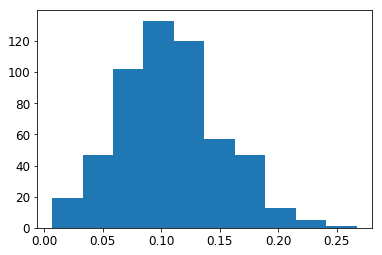

In [103]:
d,ind=dr5_tree.query(sim_grz,p=1)
print(len(ind))
plt.hist(d)

### Cutouts

In [106]:
real_ids= dr5_tractor[dr5_keep].objid
fake_ids= simcat[sim_keep].id

In [114]:
np.sum(np.zeros((10,10,3)),axis=2).shape

(10, 10)

In [129]:
a= np.zeros((10,10))
np.hstack


def mosaic(img_row1,img_row2):
    assert(img_row1.shape[-1] == img_row2.shape[-1] == 3)
    pass

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

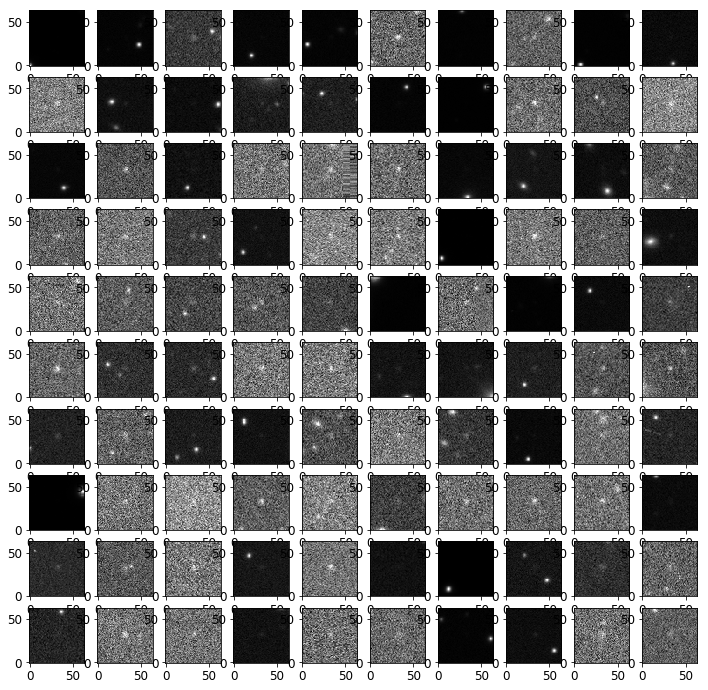

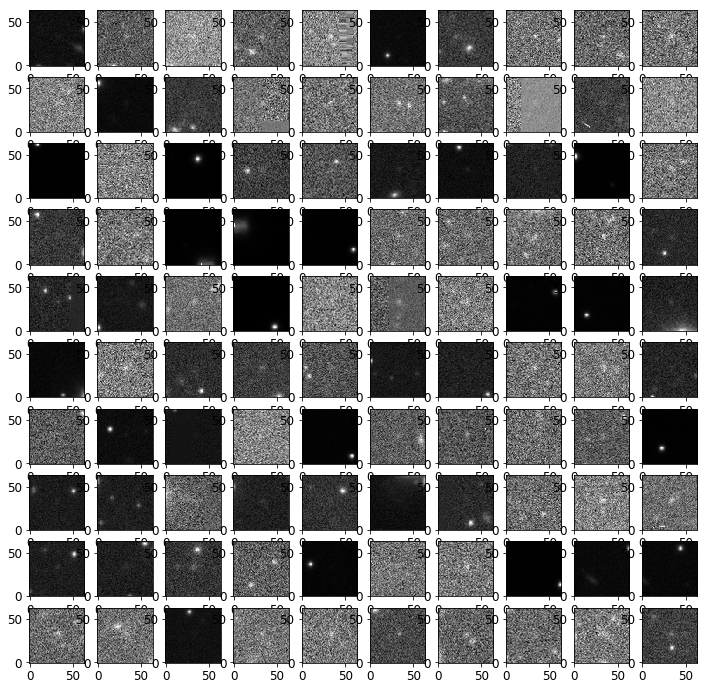

In [119]:
nrow,ncol=10,5
fig,ax= plt.subplots(nrow,ncol,figsize=(12,6))
i=-1
for row in range(nrow):
    for col in range(ncol):
        i+=1
        real_id= str(real_ids[i])
        fake_id= str(fake_ids[i])
        img= np.stack(f_real[real_id+'/img'],f_fake[fake_id+'/img'],axis=2)
        print(img.shape)
        plotImage().imshow(imgnp.sum(f_real[real_id+'/img'][...,:], axis=2),
                           ax[row,col],qs=None)
        
fig,ax= plt.subplots(nrow,ncol,figsize=(12,12))
i=-1
for row in range(nrow):
    for col in range(ncol):
        i+=1
        real_id= str(real_ids[i])
        fake_id= str(fake_ids[i])
        plotImage().imshow(np.sum(f_fake[fake_id+'/img'][...,:], axis=2),
                           ax[row,col],qs=None)

In [ ]:
fig,ax=plt.subplots()
ax.scatter(dr5['r']-dr5['z'], dr5['g']-dr5['r'],alpha=0.3,c='b',label='dr5')
ax.scatter(sim['r']-sim['z'], sim['g']-sim['r'],alpha=0.3,c='g',label='sim')
# ax.plot(pad['x1'],pad['y1'],'r--')
# ax.plot(pad['x2'],pad['y2'],c='r',ls='--',lw=2)
# ax.plot(pad['x3'],pad['y3'],c='r',ls='--',lw=2)
# ax.plot(pad['x4'],pad['y4'],c='r',ls='--',lw=2)
ax.set_xlabel('r-z')
ax.set_ylabel('g-r')
ax.set_ylim(-0.3,2)
ax.set_xlim(-0.6,2.2)

In [195]:
test= np.zeros((512,64,64,6)).astype(np.float32)
np.save('train.npy',test)

In [209]:
np.sort(np.array(list(f_real.keys())).astype(np.int32)).astype(str)[:20]

array(['18', '42', '48', '49', '50', '52', '58', '61', '65', '68', '76',
       '82', '92', '93', '94', '96', '97', '102', '105', '123'],
      dtype='<U11')

In [130]:
images_real[0].size,images_real[0].shape,64**2*6

(24576, (64, 64, 6), 24576)